Taking Data from https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
by User adityadesai13
for the purpose of predicting used car prices for Audi

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('audi_data_cleaned_vc.csv')
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,...,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn,model_type
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,3,...,0,1,0,0,1,0,0,0,0,A
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,4,...,0,0,0,1,1,0,0,0,0,A
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,4,...,0,1,0,0,1,0,0,0,0,A
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,3,...,0,0,0,1,1,0,0,0,0,A
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,...,0,1,0,0,1,0,0,0,0,A


In [163]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'age', 'mileage (km)', 'diesel_yn', 'petrol_yn',
       'hybrid_yn', 'manual_yn', 'semi_automatic_yn', 'automatic_yn',
       'A_Series_yn', 'T_Series_yn', 'S_Series_yn', 'R_Series_yn',
       'Q_Series_yn', 'model_type'],
      dtype='object')

data is split into several columns, need to pick columns which we think will contribute to the car price

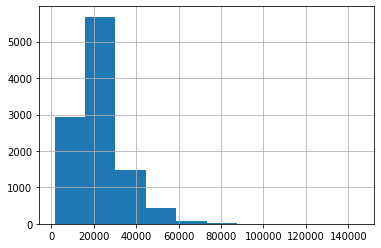

In [164]:
df.price.hist()

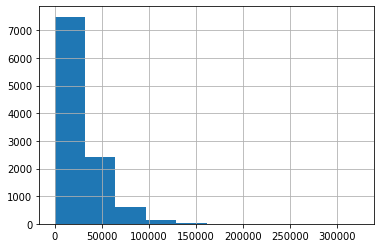

In [165]:
df.mileage.hist()

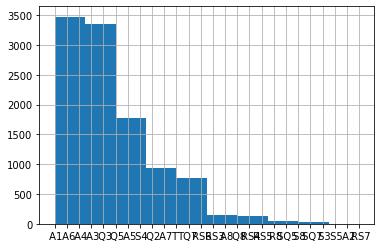

In [166]:
df.model.hist()

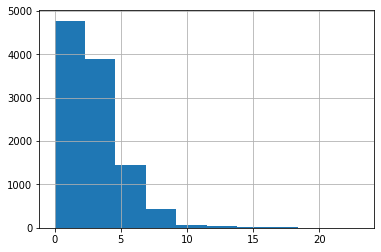

In [167]:
df.age.hist()

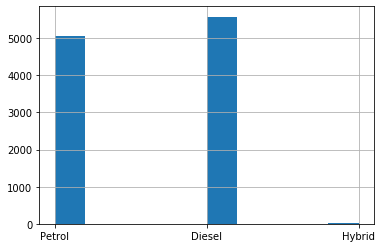

In [168]:
df.fuelType.hist()

In [169]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'age', 'mileage (km)', 'diesel_yn', 'petrol_yn',
       'hybrid_yn', 'manual_yn', 'semi_automatic_yn', 'automatic_yn',
       'A_Series_yn', 'T_Series_yn', 'S_Series_yn', 'R_Series_yn',
       'Q_Series_yn', 'model_type'],
      dtype='object')

In [170]:
df.diesel_yn.value_counts()

1    5577
0    5091
Name: diesel_yn, dtype: int64

In [171]:
df.petrol_yn.value_counts()

0    5605
1    5063
Name: petrol_yn, dtype: int64

In [172]:
df.fuelType.value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [173]:
df.transmission.value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [174]:
df.model.value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [175]:
df.A_Series_yn.value_counts()

1    6528
0    4140
Name: A_Series_yn, dtype: int64

In [176]:
df.model_type.value_counts()

A    6528
Q    3606
T     336
R     161
S      37
Name: model_type, dtype: int64

In [177]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,age,mileage (km),diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709,2.899325,39955.476097,0.522778,0.474597,0.002625,0.409543,0.336614,0.253843,0.611924,0.031496,0.018185,0.015092,0.338020
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957,2.167494,37827.953261,0.499504,0.499378,0.051167,0.491772,0.472574,0.435229,0.487335,0.174662,0.133627,0.121924,0.473058
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000,1.000000,9606.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000,3.000000,30577.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000,4.000000,58684.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000,23.000000,519817.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


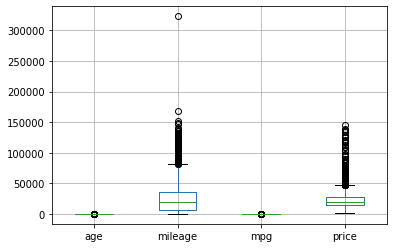

In [123]:
df.boxplot(column = ['age','mileage','mpg','price'])

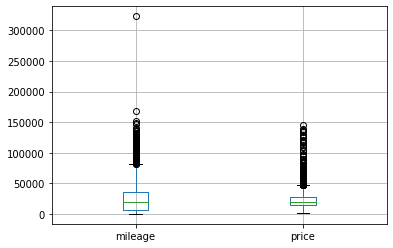

In [124]:
df.boxplot(column = ['mileage','price'])

In [125]:
df[ ['age','mileage','mpg','price']].corr()

,age,mileage,mpg,price
age,1.000000,0.789667,0.351281,-0.592581
mileage,0.789667,1.000000,0.395103,-0.535357
mpg,0.351281,0.395103,1.000000,-0.600334
price,-0.592581,-0.535357,-0.600334,1.000000


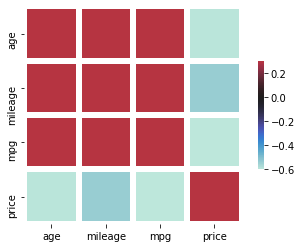

In [126]:
sns.heatmap(df[['age', 'mileage', 'mpg','price']].corr(), vmax=.3, center=0,
           square = True, linewidths=5, cbar_kws={"shrink": .5})

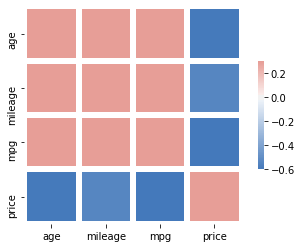

In [127]:
# yikes looks a little ugly, lets play around with a few parameters to improve the graphic
cmap = sns.diverging_palette(250, 15, center='light',as_cmap=True)
sns.heatmap(df[['age', 'mileage', 'mpg','price']].corr(),vmax=.3, center=0, cmap=cmap,
           square = True, linewidths=5, cbar_kws={"shrink": .5})

In [185]:
df_cat = df[['price', 'mileage', 'tax',
       'mpg', 'engineSize', 'age', 'mileage (km)', 'diesel_yn', 'petrol_yn',
       'hybrid_yn', 'manual_yn', 'semi_automatic_yn', 'automatic_yn',
       'A_Series_yn', 'T_Series_yn', 'S_Series_yn', 'R_Series_yn',
       'Q_Series_yn','model_type']]

1) The print statement is the first change to the code:
It is a string notation, the s reprensents i (the differnet bar charts)
and the d represents the total number of entries for each chart
2) The next change added is a x label rotation:
    i) first we add variable chart, to equal the sns.barplot
    ii) then we set the xticklabels, to rotate by 90 degrees



graph for mileage: total = 40


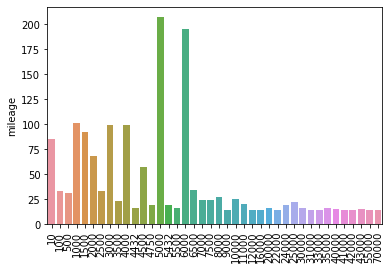

graph for age: total = 21


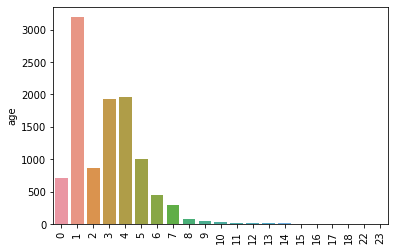

graph for tax: total = 37


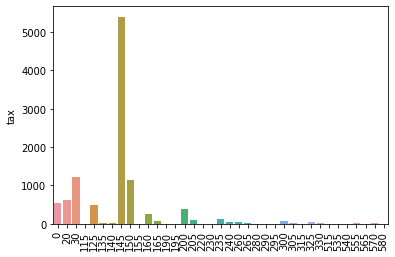

graph for price: total = 40


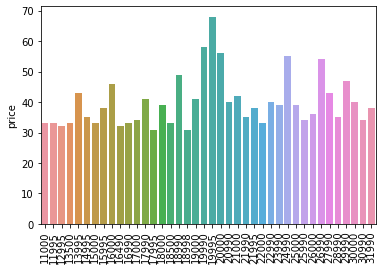

In [143]:
# lets limit the data to a few columns and a maybe the top 20 companies
for i in df_cat[['mileage','age','tax','price']].columns:
    cat_num = df_cat[i].value_counts()[:40]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [178]:
pd.pivot_table(df, index = 'model_type', values = 'price')

,price
model_type,
A,19343.811275
Q,27905.014143
R,56617.397516
S,24999.405405
T,21784.452381


In [180]:
df.price.min(), df.price.max()

(1490, 145000)

In [189]:
df_pivot = df[['price', 'mileage',
       'age', 'mileage (km)', 'diesel_yn', 'petrol_yn',
       'hybrid_yn', 'manual_yn', 'semi_automatic_yn', 'automatic_yn',
       'A_Series_yn', 'T_Series_yn', 'S_Series_yn', 'R_Series_yn',
       'Q_Series_yn','model_type']]

In [195]:
pd.pivot_table(df_pivot, index = 'model_type', values = 'price').sort_values('price', ascending = False)

,price
model_type,
R,56617.397516
Q,27905.014143
S,24999.405405
T,21784.452381
A,19343.811275


In [199]:
for i in df_pivot.columns[1:-1]:
    print(i)

mileage
age
mileage (km)
diesel_yn
petrol_yn
hybrid_yn
manual_yn
semi_automatic_yn
automatic_yn
A_Series_yn
T_Series_yn
S_Series_yn
R_Series_yn
Q_Series_yn


In [200]:
for i in df_pivot.columns[1:-1]:
    print(i)
    print(pd.pivot_table(df_pivot, index=i, values='price').sort_values('price',ascending = False))

mileage
            price
mileage          
70       137995.0
13663    125000.0
11936    117990.0
8175     112990.0
6954     109990.0
...           ...
127700     2600.0
152034     2490.0
323000     2490.0
131925     1990.0
110000     1699.0

[7725 rows x 1 columns]
age
            price
age              
0    35967.067039
1    30410.752268
2    26296.707176
3    19951.624289
4    16908.725051
5    15128.235235
6    13890.659955
7    11690.790378
8     9860.811765
9     8944.808511
13    7325.250000
10    7224.093750
14    6499.111111
11    6281.956522
12    6281.428571
16    5053.600000
22    4999.000000
23    4650.000000
15    3490.714286
17    3408.333333
18    2433.000000
mileage (km)
                 price
mileage (km)          
113           137995.0
21988         125000.0
19209         117990.0
13156         112990.0
11191         109990.0
...                ...
205513          2600.0
244674          2490.0
519817          2490.0
212312          1990.0
177027          1699.0

[7

In [201]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [202]:
df.to_csv('car_price_eda_data.csv')